In [1]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt
from math import gamma

In [2]:
#ТАБЛИЧНЫЕ ВЕЛИЧИНЫ


#Радиус Бора
a_0 =  0.52917721067*10**(-8)

#Число Авогадро
Na = 6.022* 10**(23)

#Энергия Хартри (keV)
E_h = 0.02721138602 

In [3]:
#ИНФОРМАЦИЯ ОБ АТОМЕ


#Атомный вес
A = 196.96657
z = 79

In [4]:
#ИЗМЕНЯЮЩИЕСЯ ПАРАМЕТРЫ СИСТЕМЫ


#Плотность
rho_0 = 1

In [7]:
#ВСПОМОГАТЕЛЬНЫЕ ФУНКЦИИ


#Функция Ферми-Дирака I_1/2
def integral_1_2(x):
    sqx=x**(1/2)
    xsqx=x*sqx
    #Апроксимация функции дирака трёхчленной формулой при k=1/2
    if (x>=176868.709):
        return xsqx/1.5+0.82246703342411321823620758332301/sqx+0.71027462212293443818237742585514/(x*xsqx);
    elif (x<-17.9):
        return 0.88622692545275801364908374167057*math.exp(x) 
    else: 
        if (x>30.0):
           i0=x
        else:
           i0=math.log(1.0+math.exp(x),math.e)
        
        return (0.8862269254528)*i0*((1.0+1.178*i0+(0.1812102675)*(i0**3.0))**(1.0/6.0)) 

#Функция Ферми-Дирака I_3/2
def integral_3_2(x):
    return 3/10*integral_1_2(x)*(125+60*integral_1_2(x)+18*(integral_1_2(x))**2)**(1/3)


In [8]:
#ПАРАМЕТРЫ ЯЧЕЙКИ


#Безразмерный потенциал
def eta(T,rho):
    q = 2.795*10**(-3)*z*rho/(A*T**(3/2))
    return 1/2*math.log(math.pi/6,math.e)-3/2*math.log((math.exp((2/3*q**2)**(1/3))-1),math.e)

#Заряд ядра
def z_0(T, rho):
    return 317.5 * A * pow(T, (3 / 2))*2/(np.pi**(1/2)) * integral_1_2(-eta(T,rho))/(rho)

#Средний радиус атомной ячейки
def r_0(rho):
    return 1/a_0*(3/(4*math.pi)*A/(rho*Na))**(1/3)

#Объём атомной ячейки
def volume(rho):
    return 4/2*math.pi*(r_0(rho))**3

#Число свободных электронов на атом
def rho_e(T, rho):
    return z_0(T, rho)/volume(rho)

#Характеристическая температура
def theta(T):
    return T/E_h

In [9]:
#ВАЖНЫЕ ФУНКЦИИ СОСТОЯНИЯ


#Потенциал в модели ППЭ
def V(r, T, rho):
    return z_0(T, rho) / r * (1 - 3 / 2 * r / r_0(rho) + 1 / 2 * pow((r / (r_0(rho))), 3))

#Аппроксимация давления электронного газа
def P_e(T, rho):
    return rho_e(T, rho)*((theta(T))**3+3.36*rho_e(T, rho)*(theta(T))**(3/2)+9/125*(math.pi)**4*(rho_e(T, rho))**2)**(1/3)

#Полное давление (ГПа)
def P(T, rho):
    return 2.942*10**4*(P_e(T,rho)+theta(T)/volume(rho))


In [17]:
G=[[],[],[],[],[],[]]
R=[[],[],[],[],[],[]]
for i in range(0,6):
    T = 0.01 + i*2
    rho = 0.001
    while rho < (rho_0)*10+0.01:
        eta(T,rho)
        z_0(T,rho)
        r_0(rho)
        volume(rho)
        rho_e(T,rho)
        theta(T)
        P_e(T,rho)
        P(T,rho)
        y = P(T,rho)
        G[i].append(y)
        R[i].append(rho)
        rho += 0.01

Plot:  1   T=  0.01
Plot:  2   T=  2.01
Plot:  3   T=  4.01
Plot:  4   T=  6.01
Plot:  5   T=  8.01
Plot:  6   T=  10.01


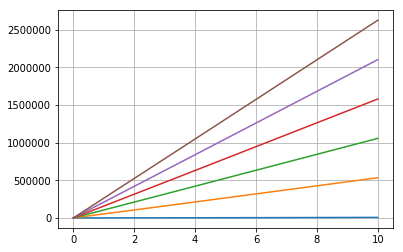

In [18]:
fig = plt.figure()
for i in range(0,6):
    graph1 = plt.plot(R[i], G[i])
    print('Plot: ',i+1,' ','T= ', 0.01 + i*2 )



# save(name='pic_2_1', fmt='pdf')
# save(name='pic_2_1', fmt='png')
plt.grid(True)
plt.show()